In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.utils import resample
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
df = pd.read_csv('../Data/features-2017-04-25-v01.csv')

In [ ]:
# resample the 

In [10]:
# drop some features
df.drop(['char_diff', 'word_diff', 'pct_shared', 'qword1', 'qword2'], axis=1, inplace=True)

X = np.array(df.drop('is_duplicate', axis=1))
y = np.array(df['is_duplicate'].values.ravel())

In [6]:
def modelfit(model, features, label, scoring):
    ''' measure and report the model's performance
    
    parameters
    ----------
    model
        then model to evaluate
    features    array
        features
    label    array
        labels
    scoring    string
        the scoring method
    '''
    
    # fit the model
    model.fit(features, label)
    
    # make predictions
    y_pred = model.predict(features)
    y_proba = model.predict_proba(features)[:,1]
    
    # perform cross validation
    n_folds = 10
    seed = 7
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_score = cross_val_score(model, features, label, cv=kfold, scoring=scoring)
    cv_accuracy = cross_val_score(model, features, label, cv=kfold, scoring='accuracy')
    
    # print the report
    print('\nModel Report')
    print('Model:\n', model)
    print('\nAccuracy: %.7g' % np.mean(cv_accuracy))
    print('\nCV score (%s): \nMean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g \n' % (scoring,np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    print('\nAUC score: %f' % metrics.roc_auc_score(y, y_proba ))
    fig = plt.figure()
    fig.suptitle('Cross Validation Score')
    ax = fig.add_subplot(111)
    plt.boxplot(cv_score)
    plt.show()


Model Report
Model:
 XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

Accuracy: 0.690905

CV score (neg_log_loss): 
Mean - -0.5340737 | Std - 0.003531531 | Min - -0.5375504 | Max - -0.5250491 


AUC score: 0.762064


Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x7fb686ba9a90>>
Traceback (most recent call last):
  File "/home/guillaume/anaconda3/lib/python3.6/site-packages/xgboost-0.6-py3.6.egg/xgboost/core.py", line 337, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
AttributeError: 'DMatrix' object has no attribute 'handle'


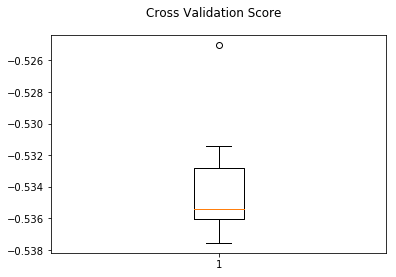

In [11]:
xgb0 = XGBClassifier()
modelfit(xgb0, X, y, 'neg_log_loss')

## 